## Week 12 Assignment

<b>Bank Marketing</b>

In this assignment, you will work with the Bank Marketing dataset to predict whether or not a customer will subscribe to a term deposit. You will use decision trees, random forests, and XGBoost to build classification models and evaluate their performance.

Instructions:

1. Use bank.csv dataset

2. Load the dataset into a Jupyter notebook or another Python environment of your choice.
            
3. Preprocess the dataset by encoding categorical features and handling missing values, if any. Use the following steps:
        
    a. Convert the categorical features to numerical using one-hot encoding or label encoding, depending on the nature of the feature.

    b. Handle missing values in the dataset. You can either drop the rows with missing values or impute them using techniques like mean or median imputation.

4. Split the dataset into training and testing sets using a 70/30 split.

5. Build a decision tree classifier using scikit-learn's DecisionTreeClassifier and train it on the training set.

6. Evaluate the performance of the decision tree classifier on the testing set using accuracy, precision, recall, and F1-score.

7. Build a random forest classifier using scikit-learn's RandomForestClassifier and train it on the training set.

8. Evaluate the performance of the tuned random forest classifier on the testing set using accuracy, precision, recall, and F1-score.

9. Build an XGBoost classifier using the xgboost library and train it on the training set.
            
10. Evaluate the performance of the tuned XGBoost classifier on the testing set using accuracy, precision, recall, and F1-score.

11. Create a visualization of all the three algorithms accuracy with respect to their accuracy, precision, recall, and F1-score.

Deliverables:

Your deliverables for this assignment should include:

1. A Jupyter notebook or another Python script with your code.

2. A report summarizing your results, including the performance of the decision tree, random forest, and XGBoost classifiers, as well as a comparison of their performance.

3. A description of your preprocessing steps and how they impacted the performance of the classifiers.
                
DataSet - https://drive.google.com/file/d/1XkoLTkJMy2pheCzkDEio03FrWaYvHw5l/view?usp=sharing

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
bank_data = pd.read_csv("bank.csv")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No null values present in dataset.

In [5]:
#Separating the features and the target
X=bank_data.drop("y",axis=1)
y=bank_data["y"]

In [6]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [7]:
y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [8]:
#Getting the categorical column names
categorical_columns = X.select_dtypes(include=["object"]).columns

In [9]:
#Encoding all the categorical variables

In [10]:
ohe = OneHotEncoder()
ohe_columns = ohe.fit_transform(X[categorical_columns])
X[ohe.get_feature_names_out(categorical_columns)] = ohe_columns.toarray()
X.drop(categorical_columns,inplace=True,axis=1)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,220,1,339,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,185,1,330,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,1476,3,199,4,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,5,226,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#Scaling all the features
scaler = StandardScaler()
scaled_data_array=scaler.fit_transform(X)
X_transformed = pd.DataFrame(scaled_data_array,columns=X.columns)

In [12]:
X_transformed

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,7.450671,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,2.868193,-0.213447,-0.171381,-2.130831
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,2.868193,-0.213447,-0.171381,-2.130831
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,2.741190,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,-0.343844,1.943983,-0.196454,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
4517,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
4518,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
4519,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197,-0.343844,1.943983,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.348652,4.685001,-0.171381,-2.130831


In [13]:
#Transforming the target column from categorical to numerical
map_dict = {"no":0,"yes":1}
y=y.map(map_dict)
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [14]:
#Train Test Split at 70/30
xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y, test_size=0.3)

In [15]:
xtrain.shape, xtest.shape

((3164, 51), (1357, 51))

In [16]:
ytrain.shape, ytest.shape

((3164,), (1357,))

In [17]:
dict_scores = { 
                "Decision Tree Classifier":{
                    "Accuracy Score":None,
                    "Precision Score":{0:None,1:None},
                    "Recall Score":{0:None,1:None},
                    "F1 Score":{0:None,1:None}
                },
                "Random Forest Classifier":{
                    "Accuracy Score":None,
                    "Precision Score":{0:None,1:None},
                    "Recall Score":{0:None,1:None},
                    "F1 Score":{0:None,1:None}
                },
                "XGBoost":{
                    "Accuracy Score":None,
                    "Precision Score":{0:None,1:None},
                    "Recall Score":{0:None,1:None},
                    "F1 Score":{0:None,1:None}
                }
            }

In [18]:
#Decision Tree Classifier

In [19]:
DTC = DecisionTreeClassifier(criterion="entropy")
DTC.fit(xtrain,ytrain)
ypred = DTC.predict(xtest)

In [20]:
dict_scores["Decision Tree Classifier"]["Accuracy Score"]=accuracy_score(y_true=ytest,y_pred=ypred)
accuracy_score(y_true=ytest,y_pred=ypred)

0.8651436993367723

In [21]:
dict_scores["Decision Tree Classifier"]["Precision Score"][0]=precision_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["Decision Tree Classifier"]["Precision Score"][1]=precision_score(y_true=ytest,y_pred=ypred,pos_label=1)
precision_score(y_true=ytest,y_pred=ypred,pos_label=0),precision_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9254868755292125, 0.4602272727272727)

In [22]:
dict_scores["Decision Tree Classifier"]["Recall Score"][0]=recall_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["Decision Tree Classifier"]["Recall Score"][1]=recall_score(y_true=ytest,y_pred=ypred,pos_label=1)
recall_score(y_true=ytest,y_pred=ypred,pos_label=0),recall_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.92003367003367, 0.47928994082840237)

In [23]:
dict_scores["Decision Tree Classifier"]["F1 Score"][0]=f1_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["Decision Tree Classifier"]["F1 Score"][1]=f1_score(y_true=ytest,y_pred=ypred,pos_label=1)
f1_score(y_true=ytest,y_pred=ypred,pos_label=0),f1_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9227522161249472, 0.46956521739130436)

In [24]:
#Random Forest Classifier

In [25]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(xtrain, ytrain)
ypred = RFC.predict(xtest)

In [26]:
dict_scores["Random Forest Classifier"]["Accuracy Score"]=accuracy_score(y_true=ytest,y_pred=ypred)
accuracy_score(y_true=ytest,y_pred=ypred)

0.8931466470154753

In [27]:
dict_scores["Random Forest Classifier"]["Precision Score"][0]=precision_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["Random Forest Classifier"]["Precision Score"][1]=precision_score(y_true=ytest,y_pred=ypred,pos_label=1)
precision_score(y_true=ytest,y_pred=ypred,pos_label=0),precision_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9033255993812839, 0.6875)

In [28]:
dict_scores["Random Forest Classifier"]["Recall Score"][0]=recall_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["Random Forest Classifier"]["Recall Score"][1]=recall_score(y_true=ytest,y_pred=ypred,pos_label=1)
recall_score(y_true=ytest,y_pred=ypred,pos_label=0),recall_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9831649831649831, 0.2603550295857988)

In [29]:
dict_scores["Random Forest Classifier"]["F1 Score"][0]=f1_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["Random Forest Classifier"]["F1 Score"][1]=f1_score(y_true=ytest,y_pred=ypred,pos_label=1)
f1_score(y_true=ytest,y_pred=ypred,pos_label=0),f1_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9415558242644095, 0.37768240343347637)

In [30]:
#XGBoost

In [31]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)

In [32]:
dict_scores["XGBoost"]["Accuracy Score"]=accuracy_score(y_true=ytest,y_pred=ypred)
accuracy_score(y_true=ytest,y_pred=ypred)

0.8975681650700074

In [33]:
dict_scores["XGBoost"]["Precision Score"][0]=precision_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["XGBoost"]["Precision Score"][1]=precision_score(y_true=ytest,y_pred=ypred,pos_label=1)
precision_score(y_true=ytest,y_pred=ypred,pos_label=0),precision_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9226430298146656, 0.6293103448275862)

In [34]:
dict_scores["XGBoost"]["Recall Score"][0]=recall_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["XGBoost"]["Recall Score"][1]=recall_score(y_true=ytest,y_pred=ypred,pos_label=1)
recall_score(y_true=ytest,y_pred=ypred,pos_label=0),recall_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9638047138047138, 0.4319526627218935)

In [35]:
dict_scores["XGBoost"]["F1 Score"][0]=f1_score(y_true=ytest,y_pred=ypred,pos_label=0)
dict_scores["XGBoost"]["F1 Score"][1]=f1_score(y_true=ytest,y_pred=ypred,pos_label=1)
f1_score(y_true=ytest,y_pred=ypred,pos_label=0),f1_score(y_true=ytest,y_pred=ypred,pos_label=1)

(0.9427748044462742, 0.512280701754386)

In [37]:
dict_scores

{'Decision Tree Classifier': {'Accuracy Score': 0.8651436993367723,
  'Precision Score': {0: 0.9254868755292125, 1: 0.4602272727272727},
  'Recall Score': {0: 0.92003367003367, 1: 0.47928994082840237},
  'F1 Score': {0: 0.9227522161249472, 1: 0.46956521739130436}},
 'Random Forest Classifier': {'Accuracy Score': 0.8931466470154753,
  'Precision Score': {0: 0.9033255993812839, 1: 0.6875},
  'Recall Score': {0: 0.9831649831649831, 1: 0.2603550295857988},
  'F1 Score': {0: 0.9415558242644095, 1: 0.37768240343347637}},
 'XGBoost': {'Accuracy Score': 0.8975681650700074,
  'Precision Score': {0: 0.9226430298146656, 1: 0.6293103448275862},
  'Recall Score': {0: 0.9638047138047138, 1: 0.4319526627218935},
  'F1 Score': {0: 0.9427748044462742, 1: 0.512280701754386}}}

In [73]:
#Data is unbalanced

In [36]:
y.value_counts()

y
0    4000
1     521
Name: count, dtype: int64

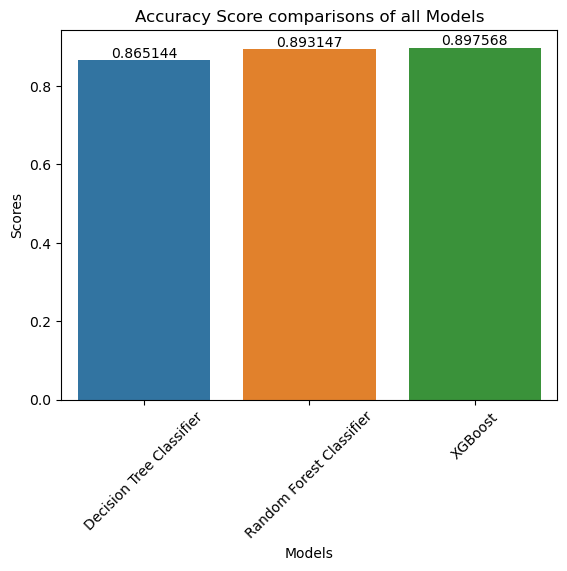

In [69]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["Accuracy Score"] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("Accuracy Score comparisons of all Models")
plt.show()

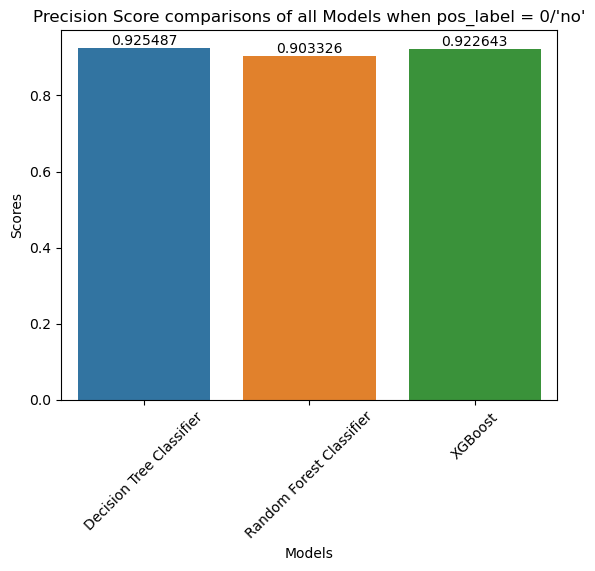

In [70]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["Precision Score"][0] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("Precision Score comparisons of all Models when pos_label = 0/'no'")
plt.show()

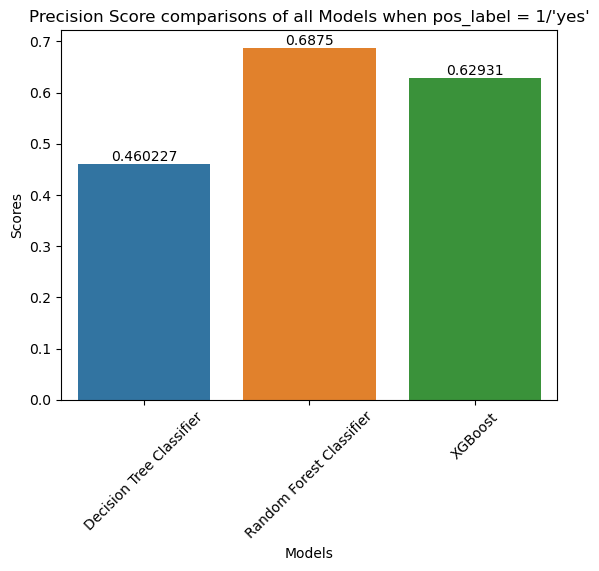

In [71]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["Precision Score"][1] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("Precision Score comparisons of all Models when pos_label = 1/'yes'")
plt.show()

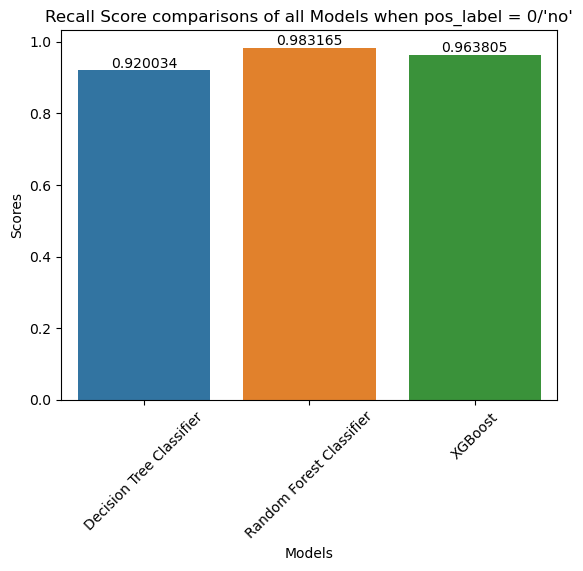

In [74]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["Recall Score"][0] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("Recall Score comparisons of all Models when pos_label = 0/'no'")
plt.show()

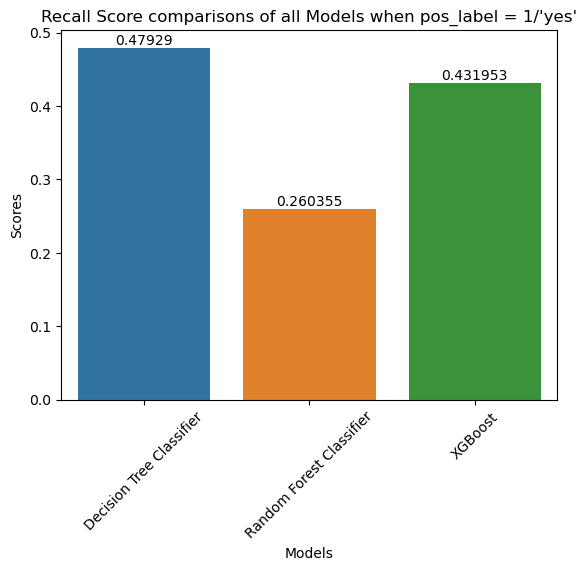

In [75]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["Recall Score"][1] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("Recall Score comparisons of all Models when pos_label = 1/'yes'")
plt.show()

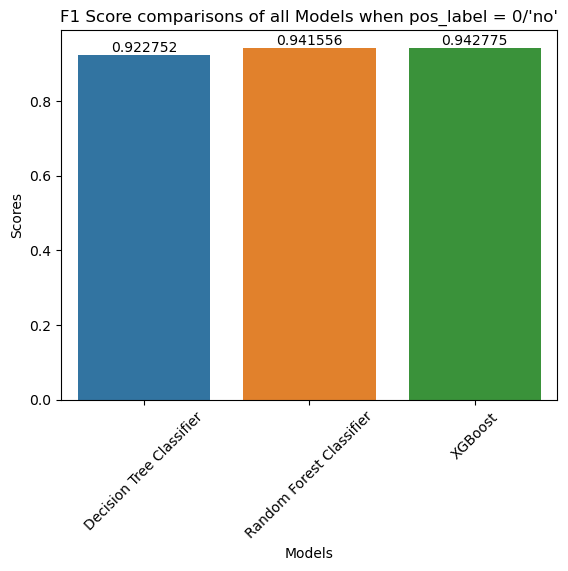

In [76]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["F1 Score"][0] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("F1 Score comparisons of all Models when pos_label = 0/'no'")
plt.show()

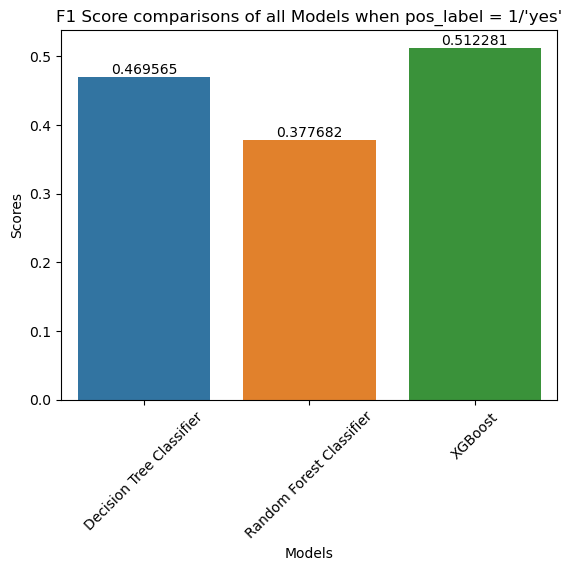

In [77]:
labels=list(dict_scores.keys())
values=[dict_scores[x]["F1 Score"][1] for x in dict_scores.keys()]
ax=sns.barplot(x=labels,y=values,hue=labels)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title("F1 Score comparisons of all Models when pos_label = 1/'yes'")
plt.show()

1. The dataset is heavily unbalanced with most data point values for the target column being 0/'no' compared to 1/'yes'.

2. The scores for the metrics precision,recall and f1 score are much higher when pos_label is 0 than when pos_label is 1.

3. The model scores are pretty close for all the metrics tested when pos_label is 0.

4. Regardless of whichever model is used, it will be much better at accurately determining when the customer will not subscribe to a term deposit.

5. If it predicts 'no'/0 for a particular input, then that input to the model should be further checked manually, instead of directly assigning it a 'yes'/1.